### 1. LOADING FILES

In [1]:
import pickle 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import openpyxl

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score,f1_score,confusion_matrix

In [4]:
train=pd.read_csv('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\data\df_train_balanced.csv',sep=',')
test=pd.read_csv('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\data\df_test_balanced.csv',sep=',')
X_test=test[['Código Distrito Centro','Age_range_code','Nationality_code','Sexo_code']]
X_train=train[['Código Distrito Centro','Age_range_code','Nationality_code','Sexo_code']]
y_test=test['Código Tipo Supuesto Urgente']
y_train=train['Código Tipo Supuesto Urgente']

In [5]:
train['Código Tipo Supuesto Urgente'].value_counts()

40.0    5990
30.0    5530
50.0    1844
10.0     721
20.0      62
Name: Código Tipo Supuesto Urgente, dtype: int64

In [6]:
test['Código Tipo Supuesto Urgente'].value_counts()

40.0    2055
30.0    1801
50.0     603
10.0     236
20.0      21
Name: Código Tipo Supuesto Urgente, dtype: int64

In [7]:
def load_files(file):
    '''
    Cargar modelos con formato binario en un notebook o fichero python
    '''
    os.chdir('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\model')
    model = pickle.load( open( file, "rb" ) )
    return model

Aqui vamos a cargar los modelos para pasar los test

In [13]:
ADA= load_files('ADA_RS220925132025.pickle')
BAG = load_files('BSG_RS220925132037.pickle')
DTC = load_files('BSG_RS220925132037.pickle')
GBCT = load_files('GBCT_RS220925132053.pickle')
KNN = load_files('KNN_RS220925132106.pickle')
LOGREG = load_files('LOGREG_RS220925132101.pickle')
RND = load_files('RND_RS220925132045.pickle')

### 2. CALCULATING ERROR IN EACH MODEL

In [14]:
def error_modelo(model, x_test, Y_test):
    '''
    Dejamos grabada cada uno de los parámetros de cada modelo y hacemos su representación
    '''
    y_pred = model.predict(X_test)
    f1_model=f1_score(y_test, y_pred,average='macro')
    acc_model=accuracy_score(y_test, y_pred)
    precision_model=precision_score(y_test, y_pred,average='macro')
    recall_model=recall_score(y_test, y_pred,average='macro')
    roc_auc_model=roc_auc_score(y_test, model.predict_proba(X_test),multi_class='ovr')
    conf_model=confusion_matrix(y_test, y_pred, normalize='true')
    model_error = {'accuracy': acc_model, 'f-1': f1_model, 'recall': recall_model , 'precision': precision_model}
    df=pd.DataFrame.from_dict(model_error,orient='index')
    print('Accuracy', acc_model)
    print('F1', f1_model)
    print('Precision', precision_model)
    print('Recall', recall_model)
    print('-'*30)
    print('ROC', roc_auc_model)

    plt.figure(figsize=(10,10))
    sns.heatmap(conf_model, annot=True)
    return df




c:\Users\jtr_7\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy 0.6961407972858354
F1 0.3414456219481885
Precision 0.3822236261059524
Recall 0.35553503316318114
------------------------------
ROC 0.5850946232373366


,ADA
accuracy,0.696141
f-1,0.341446
recall,0.355535
precision,0.382224


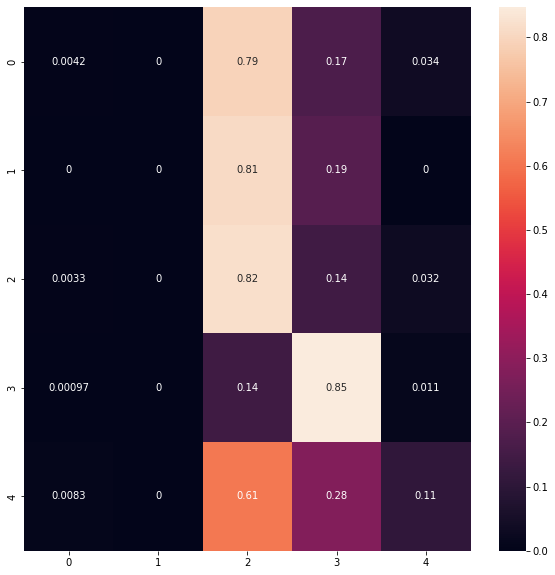

In [15]:
df_ADA= error_modelo(ADA,X_test,y_test)
df_ADA.columns=['ADA']
df_ADA

Accuracy 0.6991094147582697
F1 0.3396319435117951
Precision 0.4056174289289184
Recall 0.35533062317403974
------------------------------
ROC 0.7438492927602388


,BAG
accuracy,0.699109
f-1,0.339632
recall,0.355331
precision,0.405617


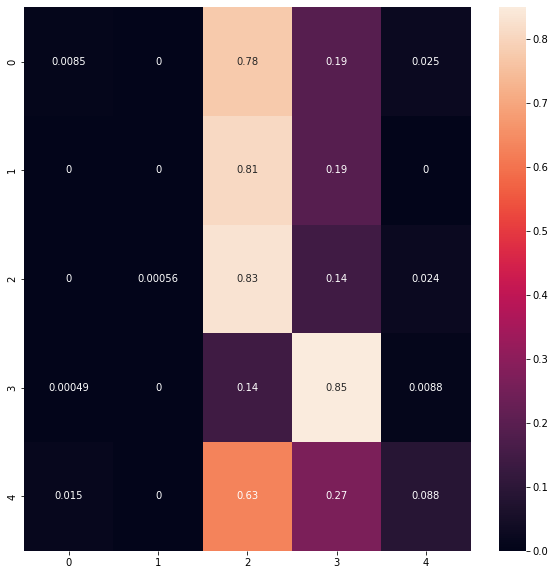

In [16]:
df_BAG= error_modelo(BAG,X_test,y_test)
df_BAG.columns=['BAG']
df_BAG


Accuracy 0.6991094147582697
F1 0.3396319435117951
Precision 0.4056174289289184
Recall 0.35533062317403974
------------------------------
ROC 0.7438492927602388


,DTC
accuracy,0.699109
f-1,0.339632
recall,0.355331
precision,0.405617


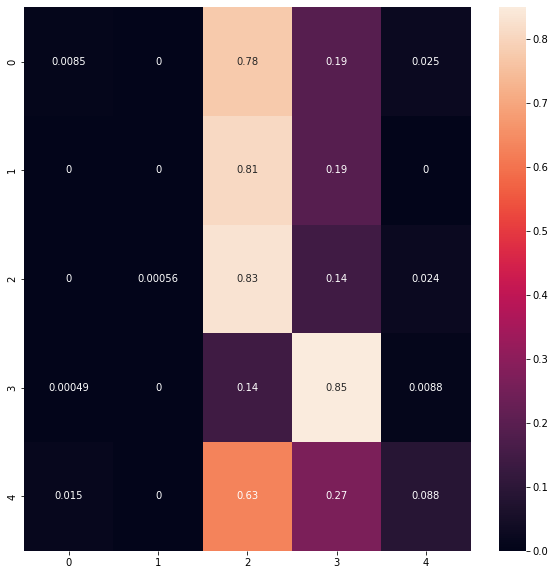

In [17]:
df_DTC= error_modelo(DTC,X_test,y_test)
df_DTC.columns=['DTC']
df_DTC

Accuracy 0.6967769296013571
F1 0.34125970752451085
Precision 0.3887287440866466
Recall 0.35543283283644395
------------------------------
ROC 0.7025547485277112


c:\Users\jtr_7\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,RND
accuracy,0.696777
f-1,0.341260
recall,0.355433
precision,0.388729


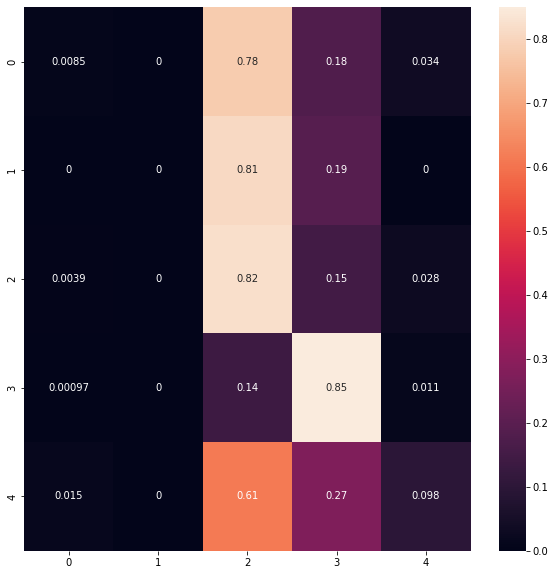

In [18]:
df_RND= error_modelo(RND,X_test,y_test)
df_RND.columns=['RND']
df_RND

Accuracy 0.7035623409669212
F1 0.33075823041714053
Precision 0.42541791426206566
Recall 0.3525284801910022
------------------------------
ROC 0.724511737169128


c:\Users\jtr_7\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,GBCT
accuracy,0.703562
f-1,0.330758
recall,0.352528
precision,0.425418


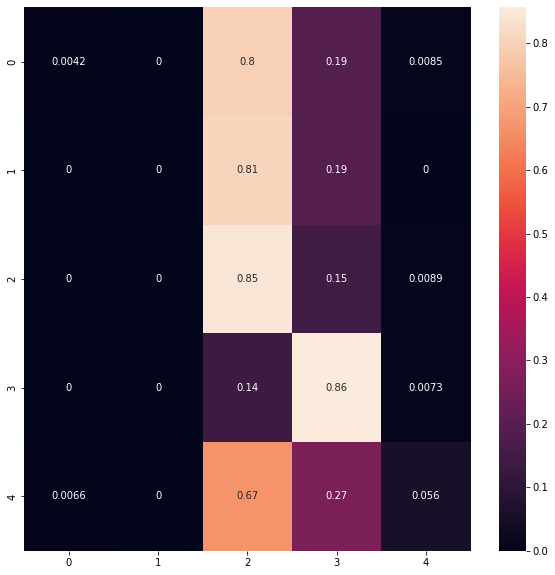

In [19]:
df_GBCT= error_modelo(GBCT,X_test,y_test)
df_GBCT.columns=['GBCT']
df_GBCT

Accuracy 0.47476675148430875
F1 0.21482623369022535
Precision 0.20834711395987324
Recall 0.2382712359455729
------------------------------
ROC 0.5740102794361164


c:\Users\jtr_7\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,KNN
accuracy,0.474767
f-1,0.214826
recall,0.238271
precision,0.208347


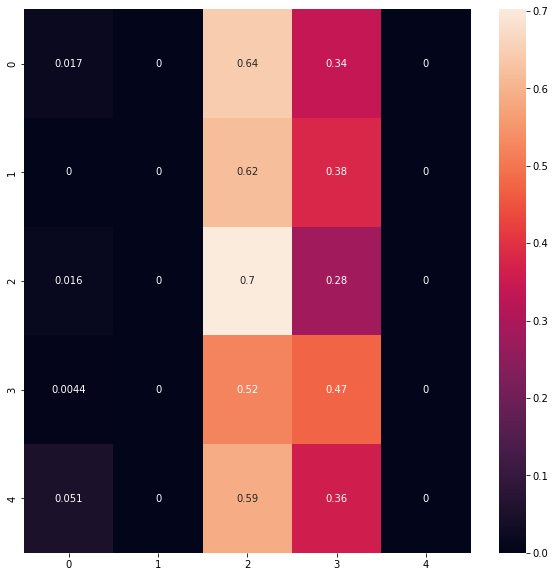

In [20]:
df_KNN= error_modelo(KNN,X_test,y_test)
df_KNN.columns=['KNN']
df_KNN

Accuracy 0.6942324003392706
F1 0.30528177125509764
Precision 0.27859817283211025
Recall 0.3393085485084658
------------------------------
ROC 0.7132963496898228


c:\Users\jtr_7\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,LOGREG
accuracy,0.694232
f-1,0.305282
recall,0.339309
precision,0.278598


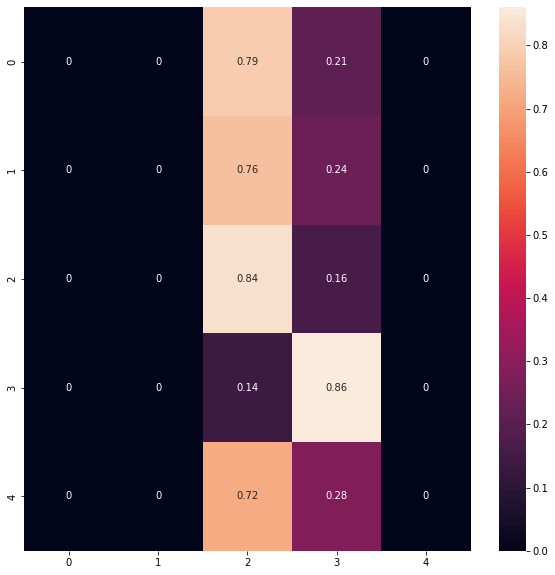

In [21]:
df_LOGREG= error_modelo(LOGREG,X_test,y_test)
df_LOGREG.columns=['LOGREG']
df_LOGREG

Se puede ver que *ninguno de los modelos se adapta mejor* a los datos al realizar RESAMPLE, por lo que apartamos este camino en vista a estos datos. 

In [22]:
df_errores=pd.DataFrame()
df_errores=pd.concat([df_ADA,df_BAG,df_DTC,df_RND,df_GBCT,df_KNN,df_LOGREG],axis=1)
df_errores

,ADA,BAG,DTC,RND,GBCT,KNN,LOGREG
accuracy,0.696141,0.699109,0.699109,0.696777,0.703562,0.474767,0.694232
f-1,0.341446,0.339632,0.339632,0.341260,0.330758,0.214826,0.305282
recall,0.355535,0.355331,0.355331,0.355433,0.352528,0.238271,0.339309
precision,0.382224,0.405617,0.405617,0.388729,0.425418,0.208347,0.278598


In [23]:
df_errores.to_excel(r'E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\resources\img\df_errores.xls',sheet_name='errores_con_undersampling',index=True,header=True)

c:\Users\jtr_7\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  """Entry point for launching an IPython kernel.
